In [16]:
import pandas as pd
import geopandas as gpd


In [80]:
df = pd.read_csv('../../data/processed/realestates_kh_v7.csv')

In [81]:
df

,id,price,bedrooms,bathrooms,land_area,address_subdivision,address_locality,address_line_2,category_name,is_parent,...,Sisowath_Riverside_Park_nearest,Sisowath_Riverside_Park_1_2km,Sisowath_Riverside_Park_2_3km,Sisowath_Riverside_Park_3_5km,Sisowath_Riverside_Park_5_10km,Phnom_Penh_Airport_nearest,Phnom_Penh_Airport_1_2km,Phnom_Penh_Airport_2_3km,Phnom_Penh_Airport_3_5km,Phnom_Penh_Airport_5_10km
0,185714.0,1100000.0,7.0,7.0,124.0,Phnom Penh,Daun Penh,Chakto Mukh,Shophouse,False,...,0,1,0,0,0,0,0,0,0,1
1,185539.0,680000.0,4.0,5.0,80.0,Phnom Penh,Chamkarmon,BKK 3,House,False,...,0,0,1,0,0,0,0,0,0,0
2,217752.0,550000.0,3.0,4.0,66.0,Phnom Penh,Daun Penh,Chey Chumneah,Retreat,False,...,0,1,0,0,0,0,0,0,0,1
3,228897.0,750000.0,9.0,10.0,116.0,Phnom Penh,Chamkarmon,Tonle Bassac,Villa,False,...,0,0,0,1,0,0,0,0,0,1
4,190024.0,420000.0,5.0,6.0,65.0,Phnom Penh,Chroy Changvar,Chroy Changvar,House,False,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6781,245046.0,270000.0,NaN,NaN,270000.0,Phnom Penh,Por Sen Chey,Kamboul,Land/Development,False,...,0,0,0,0,0,0,0,0,0,1
6782,219672.0,63000.0,NaN,1.0,63000.0,Phnom Penh,Chroy Changvar,Chroy Changvar,Condo,False,...,0,1,0,0,0,0,0,0,0,0
6783,242728.0,550000.0,6.0,6.0,550000.0,Phnom Penh,Daun Penh,Boeng Reang,Retreat,False,...,0,1,0,0,0,0,0,0,0,1
6784,205451.0,165000.0,1.0,1.0,165000.0,Phnom Penh,Chamkarmon,Tonle Bassac,Condo,False,...,0,0,1,0,0,0,0,0,0,0


In [82]:
df = df[df['price_per_m2'] >= 100].copy()

In [84]:
df.drop_duplicates(inplace=True)

In [75]:
df.drop_duplicates(inplace=True)

In [85]:
# Calculate mean, max, min of 'price_per_m2' grouped by 'h_id'
price_stats = df.groupby('address_line_2')['price_per_m2'].agg(['mean','median', 'max', 'min']).reset_index()

# Merge these stats back to the original dataframe on 'h_id'
df = df.merge(price_stats, on='address_line_2', how='left', suffixes=('', '_price_per_m2'))

# The columns 'mean', 'max', 'min' are now added to df

In [86]:
df

,id,price,bedrooms,bathrooms,land_area,address_subdivision,address_locality,address_line_2,category_name,is_parent,...,Sisowath_Riverside_Park_5_10km,Phnom_Penh_Airport_nearest,Phnom_Penh_Airport_1_2km,Phnom_Penh_Airport_2_3km,Phnom_Penh_Airport_3_5km,Phnom_Penh_Airport_5_10km,mean,median,max,min
0,185714.0,1100000.0,7.0,7.0,124.0,Phnom Penh,Daun Penh,Chakto Mukh,Shophouse,False,...,0,0,0,0,0,1,3908.371821,3829.257246,8870.967742,104.166667
1,185539.0,680000.0,4.0,5.0,80.0,Phnom Penh,Chamkarmon,BKK 3,House,False,...,0,0,0,0,0,0,2730.697070,2129.508909,8500.000000,370.370370
2,217752.0,550000.0,3.0,4.0,66.0,Phnom Penh,Daun Penh,Chey Chumneah,Retreat,False,...,0,0,0,0,0,1,3818.434615,2963.873450,8333.333333,1012.658228
3,228897.0,750000.0,9.0,10.0,116.0,Phnom Penh,Chamkarmon,Tonle Bassac,Villa,False,...,0,0,0,0,0,1,2945.379851,2878.787879,6465.517241,254.777070
4,190024.0,420000.0,5.0,6.0,65.0,Phnom Penh,Chroy Changvar,Chroy Changvar,House,False,...,0,0,0,0,0,0,2047.471213,1754.120879,6461.538462,170.135882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,160087.0,89990.0,1.0,1.0,833.0,Phnom Penh,Toul Kork,Boeung Kak 1,Condo,False,...,0,0,0,0,0,0,2376.653525,2000.000000,6000.000000,108.031212
3338,141851.0,85000.0,NaN,NaN,800.0,Phnom Penh,Chamkarmon,BKK 1,project,True,...,0,0,0,0,0,1,3009.237377,2815.533981,6428.571429,100.000000
3339,247950.0,50000.0,NaN,NaN,480.0,Phnom Penh,Daun Penh,Chakto Mukh,Business,False,...,0,0,0,0,0,1,3908.371821,3829.257246,8870.967742,104.166667
3340,243954.0,796000.0,NaN,NaN,7960.0,Phnom Penh,Dangkao,Tien,Land/Development,False,...,0,0,0,0,0,0,180.000000,120.000000,320.000000,100.000000


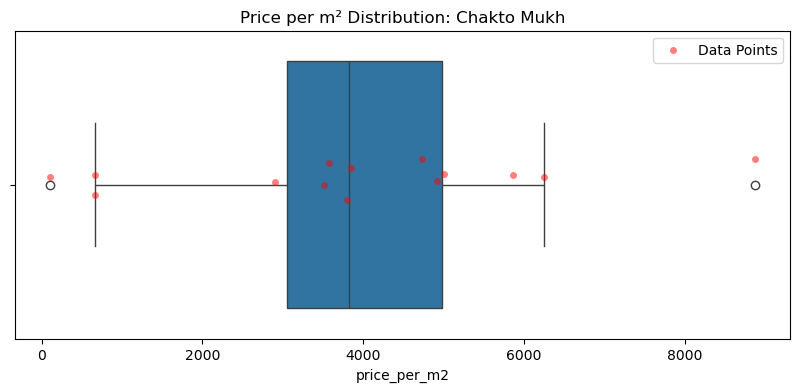

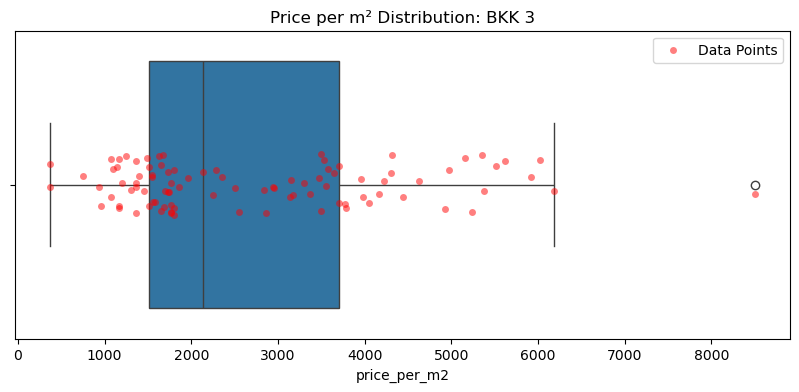

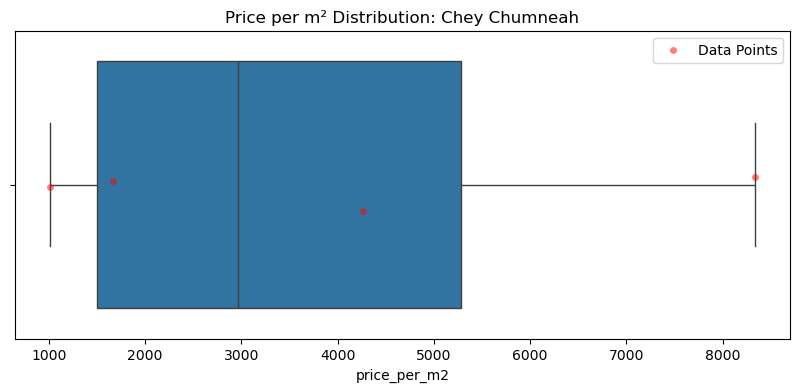

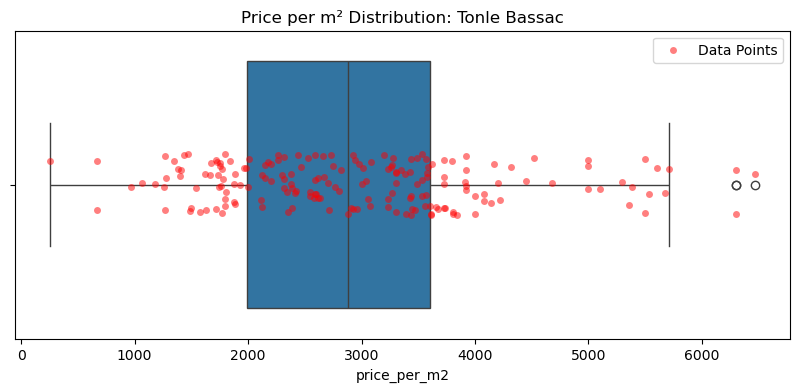

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the first 4 address_line_2 groups for plotting
groups = df['address_line_2'].unique()[:4]

for addr in groups:
    subset = df[df['address_line_2'] == addr]
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=subset['price_per_m2'])
    sns.stripplot(x=subset['price_per_m2'], color='red', alpha=0.5, label='Data Points')
    plt.title(f'Price per m² Distribution: {addr}')
    plt.xlabel('price_per_m2')
    plt.legend()
    plt.show()

In [89]:
import plotly.express as px
import plotly.io as pio

# Create a list to store figures
figs = []

# Plot for each group and add to list
groups = df['address_line_2'].unique()
for addr in groups:
    subset = df[df['address_line_2'] == addr]
    fig = px.box(subset, x='price_per_m2', points='all', title=f'Price per m²: {addr}')
    figs.append(fig)

# Save all figures to a single HTML file
with open("price_per_m2_grouped_plots.html", "w") as f:
    for fig in figs:
        f.write(pio.to_html(fig, full_html=False, include_plotlyjs='cdn'))

In [33]:
unique_address = df['address_line_2'].unique()
unique_address

array(['Chakto Mukh', 'BKK 3', 'Chey Chumneah', 'Tonle Bassac',
       'Chroy Changvar', 'Olympic', 'Boeng Reang', 'Nirouth', 'BKK 1',
       'Phsar Depou I', 'Phsar Thmei I', 'Stueng Mean chey', 'BKK 2',
       'Toul Svay Prey 1', "Tuek L'ak 1", 'Tuek Thla', 'Preaek Pra',
       'Boeung Kak 2', 'Tuol Sangke', 'Boeung Tumpun', 'Veal Sbov',
       'Toul Tum Poung 1', 'Phsar Thmei III', 'Phsar Kandal II',
       'Phnom Penh Thmey', 'Stueng Mean chey 2', 'Phsar Chas',
       'Boeung Trabek', 'Boeung Kak 1', 'Boeung Prolit', 'Khmuonh',
       'Kakab 1', 'Cheung Aek', 'Tuol Sangkae 2', 'Mittapheap',
       'Boeung Tumpun 1', 'Veal Vong', 'Tuol Sangkae 1', 'Wat Phnom',
       'Kakap', 'Russey Keo', 'Preaek Lieb', 'Chbar Ampov II',
       "Ou Baek K'am", 'Chrang Chamres I', 'Toul Svay Prey 2',
       'Chaom Chau 2', 'Stueng Mean chey 3', 'Srah Chak', 'Boeung Salang',
       'Ou Ruessei 3', 'Tumnob Tuek', "Tuek L'ak 2", 'Phsar Kandal I',
       'Phsar Thmei II', "Tuek L'ak 3", 'Chrang Chamres 

In [44]:
communes_pp = pd.read_csv('../../data/processed/test.csv')

In [46]:
print(communes_pp.head())

           Old                      New
0    Bak Kaeng                Bak Kaeng
1        BKK 1  Boeng Keng Kang Ti Muoy
2        BKK 2   Boeng Keng Kang Ti Pir
3        BKK 3   Boeng Keng Kang Ti Bei
4  Boeng Reang              Boeng Reang


In [47]:
# Create a mapping dictionary from 'Old' to 'New'
address_map = dict(zip(communes_pp['Old'], communes_pp['New']))

# Replace values in df['address_line_2'] using the mapping
df['address_line_2'] = df['address_line_2'].replace(address_map)

In [52]:
print(df.head())

         id      price  bedrooms  bathrooms  land_area address_subdivision  \
0  185714.0  1100000.0       7.0        7.0      124.0          Phnom Penh   
1  185539.0   680000.0       4.0        5.0       80.0          Phnom Penh   
2  217752.0   550000.0       3.0        4.0       66.0          Phnom Penh   
3  228897.0   750000.0       9.0       10.0      116.0          Phnom Penh   
4  190024.0   420000.0       5.0        6.0       65.0          Phnom Penh   

  address_locality          address_line_2 category_name  is_parent  ...  \
0        Daun Penh             Chakto Mukh     Shophouse      False  ...   
1       Chamkarmon  Boeng Keng Kang Ti Bei         House      False  ...   
2        Daun Penh           Chey Chumneah       Retreat      False  ...   
3       Chamkarmon             Tonle Basak         Villa      False  ...   
4   Chroy Changvar         Chrouy Changvar         House      False  ...   

  Sisowath_Riverside_Park_nearest  Sisowath_Riverside_Park_1_2km  \
0     

In [17]:
communes = gpd.read_file(r'D:\CADT\kontur_population_20231101.gpkg\CambodiaCommune_Fixed.gpkg')

In [18]:
phnom_penh_communes = communes[communes['ADM1_EN'].str.lower().str.contains('phnom penh')]

In [32]:
phnom_penh_communes.head()

,Shape_Leng,Shape_Area,ADM3_EN,ADM3_PCODE,ADM3_REF,ADM3ALT1EN,ADM3ALT2EN,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,geometry
67,0.194762,0.002058,Bak Kaeng,KH121005,None,None,None,Chraoy Chongvar,KH1210,Phnom Penh,KH12,Cambodia,KH,2014-10-14,2018-10-04,"MULTIPOLYGON (((104.96033 11.71173, 104.95587 ..."
114,0.044324,0.000121,Boeng Kak Ti Muoy,KH120407,None,None,None,Tuol Kouk,KH1204,Phnom Penh,KH12,Cambodia,KH,2014-10-14,2018-10-04,"MULTIPOLYGON (((104.90747 11.58289, 104.9057 1..."
115,0.055176,0.000140,Boeng Kak Ti Pir,KH120408,None,None,None,Tuol Kouk,KH1204,Phnom Penh,KH12,Cambodia,KH,2014-10-14,2018-10-04,"MULTIPOLYGON (((104.9035 11.57751, 104.9043 11..."
118,0.030587,0.000062,Boeng Keng Kang Ti Bei,KH120104,None,None,None,Chamkar Mon,KH1201,Phnom Penh,KH12,Cambodia,KH,2014-10-14,2018-10-04,"MULTIPOLYGON (((104.9223 11.54449, 104.91687 1..."
119,0.038194,0.000084,Boeng Keng Kang Ti Muoy,KH120102,None,None,None,Chamkar Mon,KH1201,Phnom Penh,KH12,Cambodia,KH,2014-10-14,2018-10-04,"MULTIPOLYGON (((104.9223 11.54449, 104.92188 1..."


In [28]:
kontur = gpd.read_file("D:\CADT\kontur_population_20231101.gpkg\population_clip_cambodia.gpkg", layer='population_clip_cambodia')

In [30]:
kontur.head()

,h3,population,geometry
0,886936db6dfffff,4.0,"MULTIPOLYGON (((107.3491 13.7821, 107.34966 13..."
1,886936db67fffff,9.0,"MULTIPOLYGON (((107.3617 13.77282, 107.36227 1..."
2,886936db65fffff,9.0,"MULTIPOLYGON (((107.35273 13.7739, 107.3533 13..."
3,886936db63fffff,23.0,"MULTIPOLYGON (((107.36703 13.77994, 107.3676 1..."
4,886936db61fffff,9.0,"MULTIPOLYGON (((107.35807 13.78102, 107.35863 ..."


In [55]:
df.drop(columns=['geometry', 'index_right', 'population', 'h_id'], inplace=True)

In [56]:
df

,id,price,bedrooms,bathrooms,land_area,address_subdivision,address_locality,address_line_2,category_name,is_parent,...,Sisowath_Riverside_Park_nearest,Sisowath_Riverside_Park_1_2km,Sisowath_Riverside_Park_2_3km,Sisowath_Riverside_Park_3_5km,Sisowath_Riverside_Park_5_10km,Phnom_Penh_Airport_nearest,Phnom_Penh_Airport_1_2km,Phnom_Penh_Airport_2_3km,Phnom_Penh_Airport_3_5km,Phnom_Penh_Airport_5_10km
0,185714.0,1100000.0,7.0,7.0,124.0,Phnom Penh,Daun Penh,Chakto Mukh,Shophouse,False,...,0,1,0,0,0,0,0,0,0,1
1,185539.0,680000.0,4.0,5.0,80.0,Phnom Penh,Chamkarmon,Boeng Keng Kang Ti Bei,House,False,...,0,0,1,0,0,0,0,0,0,0
2,217752.0,550000.0,3.0,4.0,66.0,Phnom Penh,Daun Penh,Chey Chumneah,Retreat,False,...,0,1,0,0,0,0,0,0,0,1
3,228897.0,750000.0,9.0,10.0,116.0,Phnom Penh,Chamkarmon,Tonle Basak,Villa,False,...,0,0,0,1,0,0,0,0,0,1
4,190024.0,420000.0,5.0,6.0,65.0,Phnom Penh,Chroy Changvar,Chrouy Changvar,House,False,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6781,245046.0,270000.0,NaN,NaN,270000.0,Phnom Penh,Por Sen Chey,Kamboul,Land/Development,False,...,0,0,0,0,0,0,0,0,0,1
6782,219672.0,63000.0,NaN,1.0,63000.0,Phnom Penh,Chroy Changvar,Chrouy Changvar,Condo,False,...,0,1,0,0,0,0,0,0,0,0
6783,242728.0,550000.0,6.0,6.0,550000.0,Phnom Penh,Daun Penh,Boeng Reang,Retreat,False,...,0,1,0,0,0,0,0,0,0,1
6784,205451.0,165000.0,1.0,1.0,165000.0,Phnom Penh,Chamkarmon,Tonle Basak,Condo,False,...,0,0,1,0,0,0,0,0,0,0


In [42]:
kontur_pp = gpd.sjoin(kontur, phnom_penh_communes, how='inner', predicate='intersects')

In [49]:
kontur_pp = kontur_pp[['h3', 'geometry', 'population', 'ADM3_EN']]

In [62]:
kontur_pp.isnull().sum()

h3            0
geometry      0
population    0
ADM3_EN       0
dtype: int64

In [57]:
import geopandas as gpd
from shapely.geometry import Point

# 1. Convert df to a GeoDataFrame using lat/lon
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df['longitude'], df['latitude']),
    crs="EPSG:4326"
)

# 2. Ensure kontur_pp is also in EPSG:4326
kontur_pp = kontur_pp.to_crs("EPSG:4326")

# 3. Spatial join: assign each property to the polygon it falls in
merged = gpd.sjoin(gdf, kontur_pp, how='left', predicate='within')

# 4. If you want to keep only rows where address_line_2 matches ADM3_EN, otherwise set population/h3 to NaN:
mask = merged['address_line_2'] == merged['ADM3_EN']
merged.loc[~mask, ['population', 'h3', 'ADM3_EN']] = None

# 5. Drop geometry columns if you want a regular DataFrame
merged = merged.drop(columns=['geometry', 'index_right'])

# 6. Save or use merged DataFrame
print(merged[['id', 'address_line_2', 'ADM3_EN', 'population', 'h3']].head())

         id address_line_2 ADM3_EN  population    h3
0  185714.0    Chakto Mukh    None         NaN  None
0  185714.0    Chakto Mukh    None         NaN  None
0  185714.0    Chakto Mukh    None         NaN  None
0  185714.0    Chakto Mukh    None         NaN  None
0  185714.0    Chakto Mukh    None         NaN  None


In [66]:
print(gdf[['longitude', 'latitude']].describe())
print(kontur_pp.total_bounds)

         longitude     latitude
count  6786.000000  6786.000000
mean    104.912451    11.554662
std       0.030051     0.037007
min     104.645470    11.342391
25%     104.899009    11.534490
50%     104.916839    11.550000
75%     104.930000    11.575610
max     105.064019    11.939206
[104.70997456  11.41123731 105.05315992  11.74351398]


In [67]:
test_merge = gpd.sjoin(gdf, kontur_pp, how='left', predicate='within')
print(test_merge[['id', 'address_line_2', 'ADM3_EN', 'population', 'h3']].head(10))
print(test_merge[['ADM3_EN', 'population', 'h3']].notnull().sum())

         id          address_line_2                  ADM3_EN  population  \
0  185714.0             Chakto Mukh      Phsar Thmei Ti Muoy     16252.0   
0  185714.0             Chakto Mukh               Phsar Chas     16252.0   
0  185714.0             Chakto Mukh       Phsar Thmei Ti Pir     16252.0   
0  185714.0             Chakto Mukh                 Monourom     16252.0   
0  185714.0             Chakto Mukh                Srah Chak     16252.0   
0  185714.0             Chakto Mukh               Voat Phnum     16252.0   
1  185539.0  Boeng Keng Kang Ti Bei              Tonle Basak      7658.0   
1  185539.0  Boeng Keng Kang Ti Bei  Boeng Keng Kang Ti Muoy      7658.0   
2  217752.0           Chey Chumneah      Phsar Thmei Ti Muoy     16252.0   
2  217752.0           Chey Chumneah               Phsar Chas     16252.0   

                h3  
0  8865846aadfffff  
0  8865846aadfffff  
0  8865846aadfffff  
0  8865846aadfffff  
0  8865846aadfffff  
0  8865846aadfffff  
1  8865846ae9fff

In [70]:
# Keep only rows where address_line_2 matches ADM3_EN
filtered = test_merge[test_merge['address_line_2'] == test_merge['ADM3_EN']].copy()

# If you want to keep unmatched points as well, but with nulls for population/h3/ADM3_EN:
# 1. Mark non-matching rows as null
test_merge.loc[test_merge['address_line_2'] != test_merge['ADM3_EN'], ['population', 'h3', 'ADM3_EN']] = None
# 2. Drop duplicates, keeping only one row per id (the matching one if exists, otherwise the first)
final = test_merge.drop_duplicates(subset='id')

print(final[['id', 'address_line_2', 'ADM3_EN', 'population', 'h3']].head(10))
print('null counts:', final.isnull().sum() )

         id           address_line_2 ADM3_EN  population    h3
0  185714.0              Chakto Mukh    None         NaN  None
1  185539.0   Boeng Keng Kang Ti Bei    None         NaN  None
2  217752.0            Chey Chumneah    None         NaN  None
3  228897.0              Tonle Basak    None         NaN  None
4  190024.0          Chrouy Changvar    None         NaN  None
5  185535.0                  Olympic    None         NaN  None
6  246446.0              Boeng Reang    None         NaN  None
7  238744.0                  Nirouth    None         NaN  None
8  214067.0  Boeng Keng Kang Ti Muoy    None         NaN  None
9  212884.0      Phsar Depou Ti Muoy    None         NaN  None
null counts: id                0
price             1
bedrooms        561
bathrooms       580
land_area         0
               ... 
geometry          0
index_right      14
h3             2737
population     2737
ADM3_EN        2737
Length: 201, dtype: int64


In [59]:
merged.drop_duplicates(inplace=True)

In [60]:
merged.isnull().sum()

id                              0
price                           1
bedrooms                      748
bathrooms                     780
land_area                       0
                             ... 
Phnom_Penh_Airport_3_5km        0
Phnom_Penh_Airport_5_10km       0
h3                           3045
population                   3045
ADM3_EN                      3045
Length: 199, dtype: int64

In [40]:
phnom_penh_communes.head()

,Shape_Leng,Shape_Area,ADM3_EN,ADM3_PCODE,ADM3_REF,ADM3ALT1EN,ADM3ALT2EN,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,geometry
67,0.194762,0.002058,Bak Kaeng,KH121005,None,None,None,Chraoy Chongvar,KH1210,Phnom Penh,KH12,Cambodia,KH,2014-10-14,2018-10-04,"MULTIPOLYGON (((104.96033 11.71173, 104.95587 ..."
114,0.044324,0.000121,Boeng Kak Ti Muoy,KH120407,None,None,None,Tuol Kouk,KH1204,Phnom Penh,KH12,Cambodia,KH,2014-10-14,2018-10-04,"MULTIPOLYGON (((104.90747 11.58289, 104.9057 1..."
115,0.055176,0.000140,Boeng Kak Ti Pir,KH120408,None,None,None,Tuol Kouk,KH1204,Phnom Penh,KH12,Cambodia,KH,2014-10-14,2018-10-04,"MULTIPOLYGON (((104.9035 11.57751, 104.9043 11..."
118,0.030587,0.000062,Boeng Keng Kang Ti Bei,KH120104,None,None,None,Chamkar Mon,KH1201,Phnom Penh,KH12,Cambodia,KH,2014-10-14,2018-10-04,"MULTIPOLYGON (((104.9223 11.54449, 104.91687 1..."
119,0.038194,0.000084,Boeng Keng Kang Ti Muoy,KH120102,None,None,None,Chamkar Mon,KH1201,Phnom Penh,KH12,Cambodia,KH,2014-10-14,2018-10-04,"MULTIPOLYGON (((104.9223 11.54449, 104.92188 1..."


In [71]:
import folium
from folium.plugins import MarkerCluster

# Center map on Phnom Penh (or your area of interest)
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=12)

# Normalize price_per_m2 for color scaling
import matplotlib
norm = matplotlib.colors.Normalize(vmin=df['price_per_m2'].min(), vmax=df['price_per_m2'].max())
cmap = matplotlib.colormaps.get_cmap('viridis') # Use .get_cmap instead of direct access

# Add points to map
for _, row in df.iterrows():
    color = matplotlib.colors.rgb2hex(cmap(norm(row['price_per_m2'])))

    # Construct the popup HTML with more information
    popup_html = f"""
    <b>id:</b> {row['id']}<br>
    <b>Address:</b> {row['address_line_2']}<br>
    <b>Property Type:</b> {row['category_name']}<br>
    <b>Bedrooms:</b> {row['bedrooms']}<br>
    <b>Area:</b> {row['land_area']:.0f} m²<br>
    <b>location:</b> {row['latitude']},{row['longitude']}<br>
    <b>Price/m²:</b> ${row['price_per_m2']:.2f}
    """

    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=4,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=folium.Popup(popup_html, max_width=300) # Use folium.Popup for better control
    ).add_to(m)

m.save('realestate_price_map_more_info.html')